In [102]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_excel('phonemetrics.xlsx')
df.head()


,lead_number,first_name,Lead Id,inbound_phone_call_counter,mobile_number,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,...,status,call_duration_sec,calls_done_by,contacted,call_time,calls_done_by2,new_followup,sales_squad,squad_role,calls_done_by_without_spaces
0,2704878,Pranav,l:861701659054416,NaN,NaN,NaN,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,...,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,SuryanshTiwari,NaN,Squad 3,Agent,SuryanshTiwari
1,2288584,Ramakrishnan,l:966563021758786,NaN,NaN,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,...,NotAnswered,0,DiptikantaJena,NaN,2024-04-17 11:25:00,DiptikantaJena,NaN,Squad 1,TL,DiptikantaJena
2,2721420,Purnima kuppala,l:430457079653387,NaN,NaN,NaN,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,...,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,JatinLuthra,NaN,Squad 3,Agent,JatinLuthra
3,693703,Sambit,NaN,NaN,NaN,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,...,Answered,64,ChitwanSoni,NaN,2024-04-17 16:44:00,ChitwanSoni,NaN,Squad 3,Agent,ChitwanSoni
4,2712125,Gokul Krishna,l:1547362259166875,NaN,NaN,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,...,Answered,12,RatneshMishra,NaN,2024-04-16 14:53:00,RatneshMishra,NaN,Squad 1,Agent,RatneshMishra


In [104]:
df.shape

(260623, 21)

In [105]:
null_values = df.isnull().sum()
print(null_values)


lead_number                          0
first_name                         123
Lead Id                          67264
inbound_phone_call_counter       61627
mobile_number                   259514
outbound_phone_call_counter      37546
lead_stage                         209
lead_score                           0
owner                                0
activity                             0
date_of_call                         0
status                               0
call_duration_sec                    0
calls_done_by                        0
contacted                       260623
call_time                            0
calls_done_by2                       0
new_followup                    257243
sales_squad                      80908
squad_role                       80908
calls_done_by_without_spaces         0
dtype: int64


In [106]:
import re

# Convert all values in 'first_name' to strings
df['first_name'] = df['first_name'].astype(str)

# Remove numbers and special characters from 'first_name'
df['first_name'] = df['first_name'].apply(lambda x: re.sub(r'[\d!@#$%^&*()_+=\[\]{};:\'",<>/?\\|`~-]', '', x))

# Fill null values in 'first_name' with 'Not provided'
df['first_name'] = df['first_name'].replace('nan', 'Not provided')

# Convert the 'first_name' column to lowercase
df['first_name'] = df['first_name'].str.lower()

# Print the updated 'first_name' column
print(df['first_name'])


0                   pranav
1             ramakrishnan
2          purnima kuppala
3                   sambit
4            gokul krishna
                ...       
260618       shruti mathur
260619              pranav
260620        divya shukla
260621      dev bhandarker
260622    shaik zainnuddin
Name: first_name, Length: 260623, dtype: object


In [107]:
value_counts = df['lead_number'].value_counts()
print(value_counts)


lead_number
819568     466
877595     204
914893     200
742964     178
856284     164
          ... 
2495132      1
2511744      1
1625173      1
365831       1
2279562      1
Name: count, Length: 42450, dtype: int64


In [108]:
df['Lead Id'] = df['Lead Id'].fillna('Not provided')

In [109]:
df.drop(columns=['inbound_phone_call_counter', 'outbound_phone_call_counter'], inplace=True)

In [110]:
df.drop(columns=['mobile_number'], inplace=True)

In [111]:
# Print the unique values in the 'lead_stage' column
unique_values = df['lead_stage'].unique()
print(unique_values)
# Count the unique values in the 'lead_stage' column
unique_values = df['lead_stage'].value_counts()

# Print the unique values and their frequency
print(unique_values)



['Token Amount' 'Document Collection' 'Counselling Booked'
 'Waiting for Offer Letter' 'Test' 'Application Filling'
 'Payment Received' 'New Enquiry' 'Not Interested' 'Counselling Done'
 'Hot' 'Warm' 'Never Picked up' 'Invalid phone number' 'Not Eligible'
 'Invalid' 'Duplicate Lead' nan 'Follow Up Required'
 'Connected/ Not Interested' 'DND' 'Enrolled' 'Cold' 'Uncontactable'
 'Future Prospects' 'Not Eligible for the Course' 'Wrong Number'
 'Future Interest' 'Connected/ Never Call Back' 'Disqualified'
 'English test Attempt1 Sent' 'Application Rejected'
 'Application Submitted']
lead_stage
New Enquiry                    123880
Not Interested                  46631
Never Picked up                 32096
Warm                            13859
Counselling Booked              10624
Token Amount                     9821
Invalid phone number             4915
Document Collection              4652
Counselling Done                 4107
Not Eligible                     2722
Cold                    

In [112]:
# Replace null values in 'lead_stage' using .loc to avoid FutureWarning
df.loc[:, 'lead_stage'] = df['lead_stage'].fillna(most_frequent_value)


In [113]:
import pandas as pd

# Load your DataFrame (assuming df is your DataFrame)
# df = pd.read_csv('your_file.csv')

# Define the mapping of old values to new combined names
lead_stage_mapping = {
    'Application Filling': 'Application Process',
    'Application Submitted': 'Application Process',
    'Application Rejected': 'Application Process',
    'Token Amount': 'Payment Made',
    'Payment Received': 'Payment Made',
    'Counselling Booked': 'Counselling Completed',
    'Counselling Done': 'Counselling Completed',
    'Hot': 'High Interest',
    'Warm': 'High Interest',
    'Cold': 'Low Interest',
    'Future Prospects': 'Low Interest',
    'Future Interest': 'Low Interest',
    'Never Picked up': 'Unresponsive',
    'Uncontactable': 'Unresponsive',
    'Connected/ Never Call Back': 'Unresponsive',
    'DND': 'Invalid Contact',
    'Wrong Number': 'Invalid Contact',
    'Invalid phone number': 'Invalid Contact',
    'Not Eligible': 'Not Eligible',
    'Not Eligible for the Course': 'Not Eligible',
    'Duplicate Lead': 'Invalid Lead',
    'Invalid': 'Invalid Lead',
    'Follow Up Required': 'Follow-Up Needed',
    'Connected/ Not Interested': 'Not Interested',
    'Not Interested': 'Not Interested',
    'English test Attempt1 Sent': 'Test Process',
    'Test': 'Test Process',
    'Document Collection': 'Document Pending',
    'Waiting for Offer Letter': 'Document Pending',
    'Enrolled': 'Enrolled',
    'New Enquiry': 'New Enquiry',
    'Disqualified': 'Disqualified'
}

# Replace the values in the 'lead_stage' column
df['lead_stage'] = df['lead_stage'].map(lead_stage_mapping).fillna(df['lead_stage'])

# Save the updated DataFrame (if needed)
# df.to_csv('updated_file.csv', index=False)

print(df['lead_stage'].unique())


['Payment Made' 'Document Pending' 'Counselling Completed' 'Test Process'
 'Application Process' 'New Enquiry' 'Not Interested' 'High Interest'
 'Unresponsive' 'Invalid Contact' 'Not Eligible' 'Invalid Lead'
 'Follow-Up Needed' 'Enrolled' 'Low Interest' 'Disqualified']


In [114]:
min_lead_score = df['lead_score'].min()
max_lead_score = df['lead_score'].max()

print(f"Minimum lead score: {min_lead_score}")
print(f"Maximum lead score: {max_lead_score}")


Minimum lead score: -85
Maximum lead score: 126


In [115]:
# Define the mapping of lead stages to numerical values
lead_stage_numerical = {
    'Enrolled': 10,
    'Payment Made': 9,
    'Counselling Completed': 8,
    'Document Pending': 7,
    'Test Process': 6,
    'Application Process': 5,
    'High Interest': 4,
    'Follow-Up Needed': 3,
    'New Enquiry': 2,
    'Low Interest': 1,
    'Not Interested': 0,
    'Unresponsive': 0,
    'Invalid Contact': 0,
    'Invalid Lead': 0,
    'Not Eligible': 0,
    'Disqualified': 0
}

# Apply the mapping to create a new column 'lead_stage_score'
df['lead_stage_score'] = df['lead_stage'].map(lead_stage_numerical)

# Verify the updated DataFrame
print(df[['lead_stage', 'lead_stage_score']].head())


              lead_stage  lead_stage_score
0           Payment Made                 9
1       Document Pending                 7
2  Counselling Completed                 8
3       Document Pending                 7
4           Payment Made                 9


In [116]:
df.drop(columns=['lead_score'], inplace=True)

In [117]:
df['date_of_call'] = pd.to_datetime(df['date_of_call'], format='%m/%d/%Y %I:%M:%S %p')
df['call_date'] = df['date_of_call'].dt.strftime('%m/%d/%Y')
df['time_of_call'] = df['date_of_call'].dt.strftime('%I:%M:%S %p')


In [118]:
df.drop(columns=['date_of_call'], inplace=True)

In [119]:
df.drop(columns=['call_time'], inplace=True)

In [120]:
df['call_duration_min'] = df['call_duration_sec'] / 60

# Optional: Round to 2 decimal places for better readability
df['call_duration_min'] = df['call_duration_min'].round(2)

# Display the first few rows to check the conversion
print(df[['call_duration_sec', 'call_duration_min']].head())

   call_duration_sec  call_duration_min
0                232               3.87
1                  0               0.00
2                 18               0.30
3                 64               1.07
4                 12               0.20


In [121]:
df.drop(columns=['call_duration_sec'], inplace=True)

In [122]:
df.drop(columns=['calls_done_by', 'calls_done_by2'], inplace=True)

In [123]:
df.rename(columns={'calls_done_by_without_spaces': 'calls_done_by'}, inplace=True)


In [124]:
df.drop(columns=['contacted'], inplace=True)

In [125]:
df.drop(columns=['new_followup'], inplace=True)

In [126]:
# Proportion of missing values for 'squad_role'
squad_role_missing = df['squad_role'].isnull().mean() * 100
print(f"\nPercentage of missing values in 'squad_role': {squad_role_missing:.2f}%")

# Proportion of missing values for 'sales_squad'
sales_squad_missing = df['sales_squad'].isnull().mean() * 100
print(f"Percentage of missing values in 'sales_squad': {sales_squad_missing:.2f}%")



Percentage of missing values in 'squad_role': 31.04%
Percentage of missing values in 'sales_squad': 31.04%


In [127]:
df['sales_squad'] = df['sales_squad'].fillna('unknown')

In [128]:
df['squad_role'] = df['squad_role'].fillna('unknown')

In [129]:
df.to_csv('phonemetricsupdated.csv', index=False)

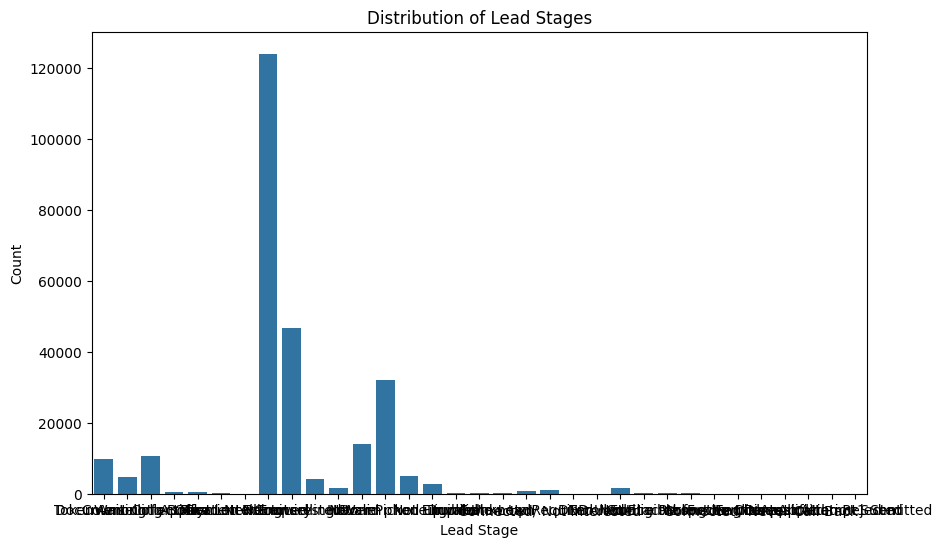

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='lead_stage')
plt.title('Distribution of Lead Stages')
plt.xlabel('Lead Stage')
plt.ylabel('Count')
plt.show()


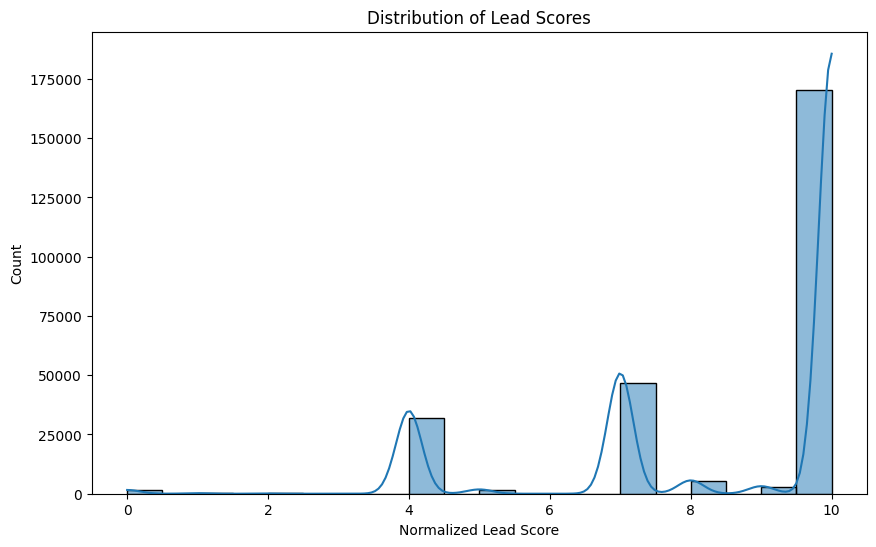

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_score'], bins=20, kde=True)
plt.title('Distribution of Lead Scores')
plt.xlabel('Normalized Lead Score')
plt.ylabel('Count')
plt.show()

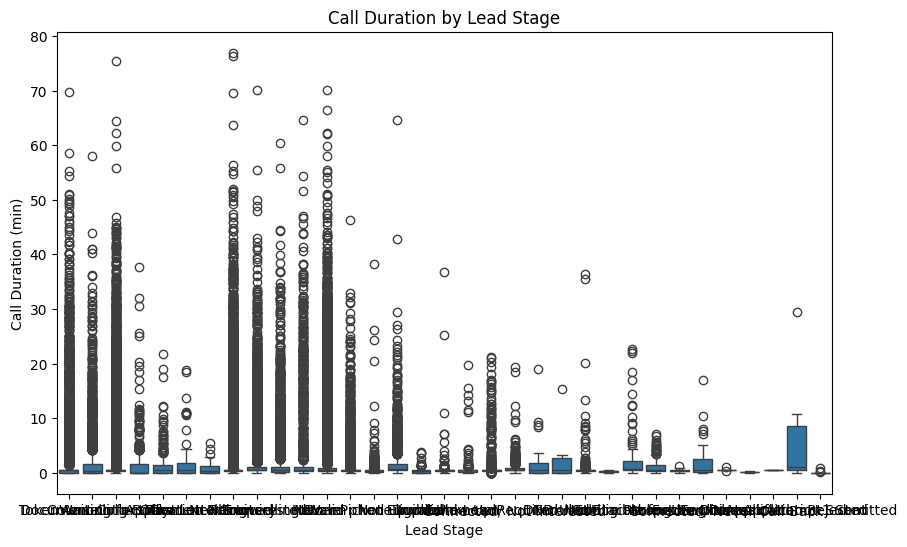

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='lead_stage', y='call_duration_min')
plt.title('Call Duration by Lead Stage')
plt.xlabel('Lead Stage')
plt.ylabel('Call Duration (min)')
plt.show()

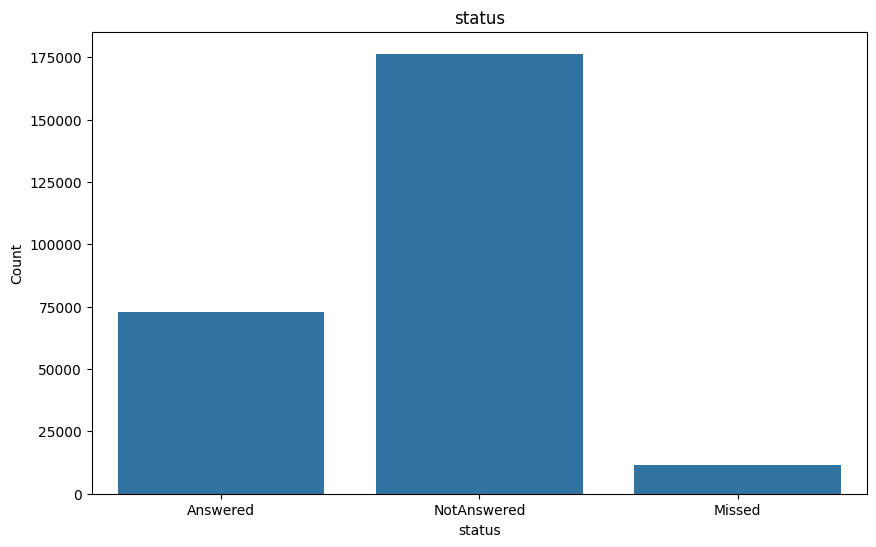

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status')
plt.title('status')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()


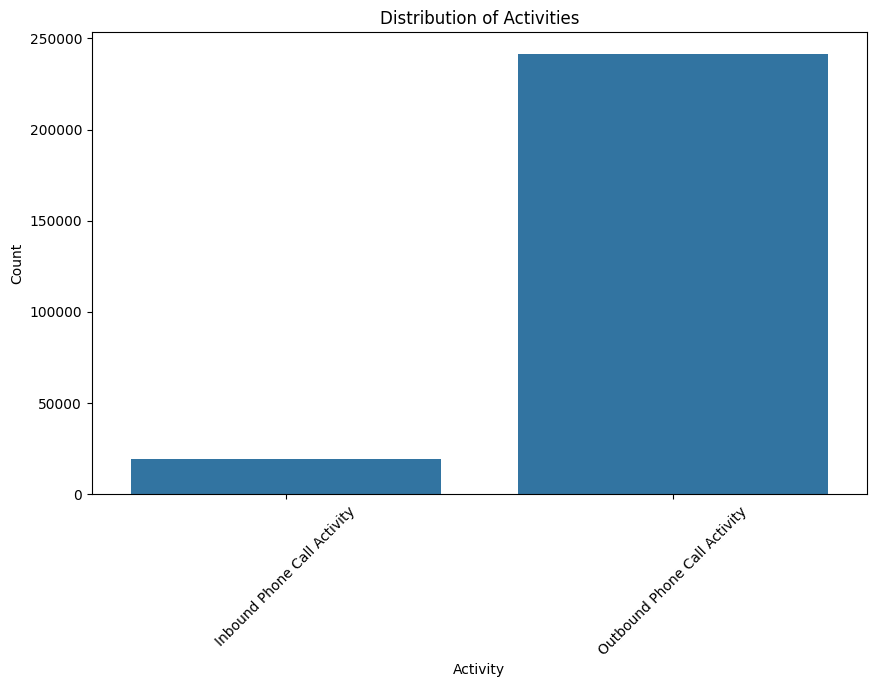

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity')
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
